In [1]:
import requests
import urllib.request
def kakao_reverse_geocode(lat, lon):
    addr_list = []
    roadaddr_list =[]
    building_list =[]
    api_key = 'KakaoAK 5bc7785bedf372180f58929a0899232f'
    url = 'https://dapi.kakao.com/v2/local/geo/coord2address.json?&x=' + str(lon) +'&y=' + str(lat) 
    option = '&sort=distance&input_coord=WGS84'
    result = requests.get(url+option, headers={'Authorization': api_key}).json()
    #print(result)
    match_first = result['documents'][0]
    #print(match_first)
    if match_first["road_address"]== None:
        addr_list.append(match_first["address"]["address_name"])
        roadaddr_list.append("no results")
        building_list.append("no results")
        return addr_list,roadaddr_list,building_list
    else:
        addr_list.append(match_first["address"]["address_name"])
        roadaddr_list.append(match_first["road_address"]["address_name"])
        building_list.append(match_first["road_address"]["building_name"])
        return addr_list, roadaddr_list,building_list

In [2]:
def kakao_get_place(addr):
    place = []
    api_key = 'KakaoAK 5bc7785bedf372180f58929a0899232f'
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?&query='
    query = urllib.parse.quote(addr)
    for j in range(1,4):
        result = requests.get(url+query+"&page=" + str(j), headers={'Authorization': api_key}).json()
        if len(result['documents']) != 0:
            for i in range(len(result['documents'])):
                if result['documents'][i]["place_name"] !="":
                    if result['documents'][i]["place_name"] not in place:
                        place.append(result['documents'][i]["place_name"])
        else:
            place.append("no results")
    return place

In [3]:
def get_geojson_grid(upper_right, lower_left, n=6):
    """Returns a grid of geojson rectangles, and computes the exposure in each section of the grid based on the vessel data.

    Parameters
    ----------
    upper_right: array_like
        The upper right hand corner of "grid of grids" (the default is the upper right hand [lat, lon] of the USA).

    lower_left: array_like
        The lower left hand corner of "grid of grids"  (the default is the lower left hand [lat, lon] of the USA).

    n: integer
        The number of rows/columns in the (n,n) grid.

    Returns
    -------

    list
        List of "geojson style" dictionary objects   
    """

    all_boxes = []

    lat_steps = np.linspace(lower_left[0], upper_right[0], n+1)
    lon_steps = np.linspace(lower_left[1], upper_right[1], n+1)

    lat_stride = lat_steps[1] - lat_steps[0]
    lon_stride = lon_steps[1] - lon_steps[0]

    for lat in lat_steps[:-1]:
        for lon in lon_steps[:-1]:
            # Define dimensions of box in grid
            upper_left = [lon, lat + lat_stride]
            upper_right = [lon + lon_stride, lat + lat_stride]
            lower_right = [lon + lon_stride, lat]
            lower_left = [lon, lat]

            # Define json coordinates for polygon
            coordinates = [
                upper_left,
                upper_right,
                lower_right,
                lower_left,
                upper_left
            ]

            geo_json = {"type": "FeatureCollection",
                        "properties":{
                            "lower_left": lower_left,
                            "upper_right": upper_right
                        },
                        "features":[]}

            grid_feature = {
                "type":"Feature",
                "geometry":{
                    "type":"Polygon",
                    "coordinates": [coordinates],
                }
            }

            geo_json["features"].append(grid_feature)

            all_boxes.append(geo_json)

    return all_boxes

In [4]:
def remove_0(df):
    for i in range(len(df)):
        if df['lat'][i] == 0 or df['lon'][i] == 0:
            df = df.drop(i)
        
    df = df.reset_index(drop=True)
    return df

In [5]:
def get_xdata(df):
    x = df.iloc[:, [7, 8]].values
    return x

In [6]:
def get_cluster_count(cluster):
    cluster_list = []
    for i in cluster:
        if i not in cluster_list:
            cluster_list.append(i)
    return cluster_list

In [9]:
import pymssql
from math import *
import pandas as pd
import numpy as np 

# DB 서버 주소
server = '203.234.62.143'
# 데이터 베이스 이름
database = 'test'
# 접속 유저명
username = 'sojin'
# 접속 유저 패스워드
password = '1234'

conn = pymssql.connect(server , username, password, database)
curs = conn.cursor()

#curs.execute()

time1 = "2019-04-09 12:54:04.000"
time2 = "2019-04-09 14:03:36.000"
# sql = 'SELECT TOP (1000) *  FROM lifelog_manual'
sql = "SELECT * FROM lifelog_raw WHERE userid = 'GAH0050' and \
time between '" + time1 + "' and '" + time2 +"' order by time asc;"
df = pd.read_sql(sql, con = conn)

conn.close()

In [10]:
df

,Id,userid,time,x,y,z,HR,lat,lon,alt,acttype,actaccu
0,4484665,GAH0050,2019-04-09 12:54:04,-1.372982,3.703371,0.087506,0,0.000000,0.000000,0.000000,unknown,unknown
1,4484666,GAH0050,2019-04-09 12:54:09,-0.834885,2.748834,4.254492,0,0.000000,0.000000,0.000000,unknown,unknown
2,4484667,GAH0050,2019-04-09 12:54:14,-7.447315,5.581661,2.519444,0,0.000000,0.000000,0.000000,unknown,unknown
3,4484668,GAH0050,2019-04-09 12:54:19,-2.856421,1.727351,3.752013,0,0.000000,0.000000,0.000000,unknown,unknown
4,4484669,GAH0050,2019-04-09 12:54:24,0.481986,-2.633996,2.672366,0,0.000000,0.000000,0.000000,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
720,4485385,GAH0050,2019-04-09 14:03:16,3.228497,1.212404,2.442894,135,35.947121,126.680641,40.473999,unknown,unknown
721,4485386,GAH0050,2019-04-09 14:03:21,-0.619478,0.211421,0.886575,136,35.947136,126.680611,40.472000,unknown,unknown
722,4485387,GAH0050,2019-04-09 14:03:26,1.240021,-8.338935,0.819806,137,35.947159,126.680565,40.568001,unknown,unknown
723,4485388,GAH0050,2019-04-09 14:03:31,-0.968679,-2.302840,4.097807,138,35.947205,126.680534,40.880001,unknown,unknown


In [11]:
lat = 0 
lon = 0
for i in range(len(df)):
    if df['lat'][0] == 0 or df['lon'][0] == 0:
        for i in range(len(df)):
            if df['lat'][i] != 0 or df['lon'][i] != 0:
                lat = df['lat'][i]
                lon = df['lon'][i]
                break
        df['lat'][i]
    else:
        df['lat'][i] = lat
        df['lon'][i] = lon

In [ ]:
if df['lat'][0] == 0 or df['lon'][0] == 0:
    for i in range(len(df)):
        if df['lat'][i] != 0 or df['lon'][i] != 0:
            lat = df['lat'][i]
            lon = df['lon'][i]
            break
    for i in range(len(df)):
        if df['lat'][0] == 0 or df['lon'][0] == 0:
        df['lat'][i]

In [12]:
lat

35.9453239440918

In [62]:
def replace_0(df):
    lat = 0 
    lon = 0
    for i in range(len(df)):
        if df['lat'][i] != 0 or df['lon'][i] != 0:
            lat = df['lat'][i]
            lon = df['lon'][i]
            print(lat,lon)
        else:           
            df['lat'][j] = lat
            df['lon'][j] = lon
        
    df = df.reset_index(drop=True)
    return df

In [63]:
df = replace_0(df)
x = get_xdata(df)
x

35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.94533920288086 126.6843109130859
35.94535827636719 1

35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126

35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126.6842727661133
35.9453239440918 126

35.94712066650391 126.6806411743164
35.94713592529297 126.6806106567383
35.94715881347656 126.6805648803711
35.94720458984375 126.680534362793
35.94723892211914 126.680549621582


array([[ 35.94532394, 126.68427277],
       [ 35.94532394, 126.68427277],
       [ 35.94532394, 126.68427277],
       ...,
       [ 35.94715881, 126.68056488],
       [ 35.94720459, 126.68053436],
       [ 35.94723892, 126.68054962]])

In [61]:
df

,Id,userid,time,x,y,z,HR,lat,lon,alt,acttype,actaccu
0,4484665,GAH0050,2019-04-09 12:54:04,-1.372982,3.703371,0.087506,0,35.945324,126.684273,0.000000,unknown,unknown
1,4484666,GAH0050,2019-04-09 12:54:09,-0.834885,2.748834,4.254492,0,35.945324,126.684273,0.000000,unknown,unknown
2,4484667,GAH0050,2019-04-09 12:54:14,-7.447315,5.581661,2.519444,0,35.945324,126.684273,0.000000,unknown,unknown
3,4484668,GAH0050,2019-04-09 12:54:19,-2.856421,1.727351,3.752013,0,35.945324,126.684273,0.000000,unknown,unknown
4,4484669,GAH0050,2019-04-09 12:54:24,0.481986,-2.633996,2.672366,0,35.945324,126.684273,0.000000,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
720,4485385,GAH0050,2019-04-09 14:03:16,3.228497,1.212404,2.442894,135,35.947121,126.680641,40.473999,unknown,unknown
721,4485386,GAH0050,2019-04-09 14:03:21,-0.619478,0.211421,0.886575,136,35.947136,126.680611,40.472000,unknown,unknown
722,4485387,GAH0050,2019-04-09 14:03:26,1.240021,-8.338935,0.819806,137,35.947159,126.680565,40.568001,unknown,unknown
723,4485388,GAH0050,2019-04-09 14:03:31,-0.968679,-2.302840,4.097807,138,35.947205,126.680534,40.880001,unknown,unknown


# 데이터 출력

In [60]:
import numpy as np
import folium
from matplotlib import pyplot as plt
import matplotlib as mpl

lower_left = [35.94053805, 126.677630592098]
upper_right = [35.951225, 126.689017999998]
m = folium.Map(zoom_start = 15, location=[35.945881525000004, 126.683324296048])

for i in range(len(x)):
    folium.Marker(location=[x[i][0], x[i][1]], popup = (i+1)).add_to(m)

grid = get_geojson_grid(upper_right, lower_left , n=5)

for i, geo_json in enumerate(grid):

    color = plt.cm.Reds(i / len(grid))
    color = mpl.colors.to_hex(color)

    gj = folium.GeoJson(geo_json,
                        style_function=lambda feature, color=color: {
                                                                        'fillColor': "#00ff0000",
                                                                        'color': "black",
                                                                        'weight': 1,
                                                                    })

    m.add_child(gj)
m

In [16]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

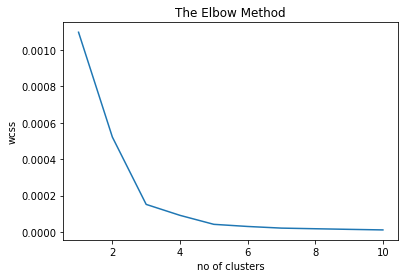

In [17]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [18]:
wcss

[0.001096563345377161,
 0.0005215350350954151,
 0.0001519509596262708,
 9.186708946863464e-05,
 4.258613389303453e-05,
 3.086742253267731e-05,
 2.184311767154564e-05,
 1.8368138031217306e-05,
 1.5019958678642059e-05,
 1.1943038372024775e-05]

1


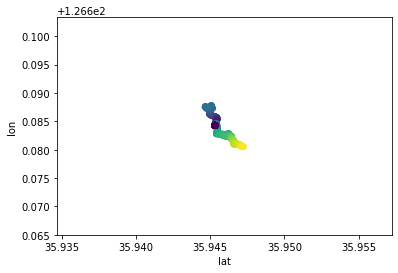

cluster of count  124
2


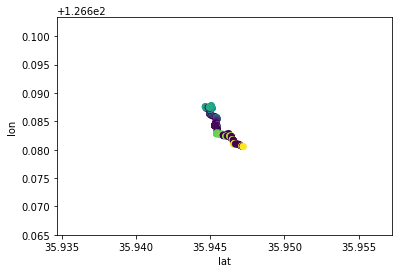

cluster of count  39
3


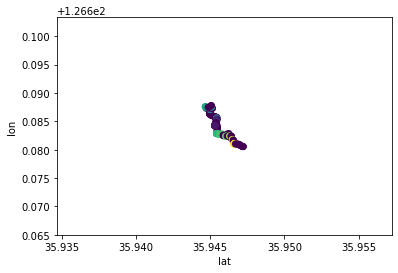

cluster of count  17
4


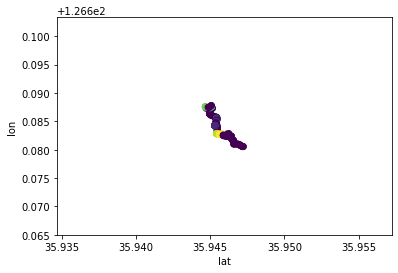

cluster of count  9
5


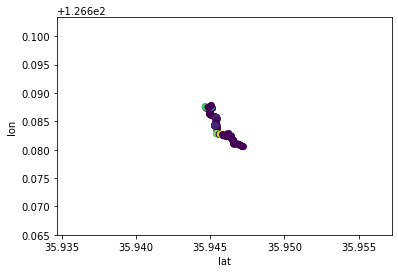

cluster of count  10
6


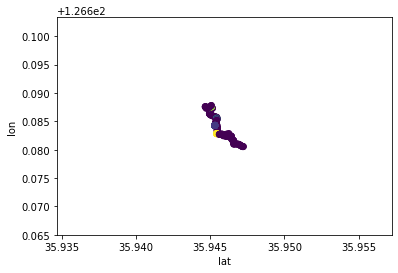

cluster of count  6
7


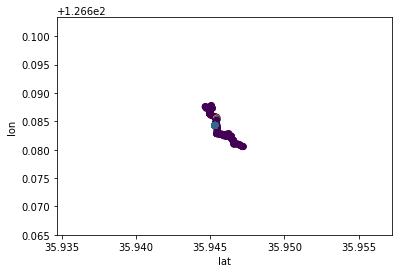

cluster of count  3
8


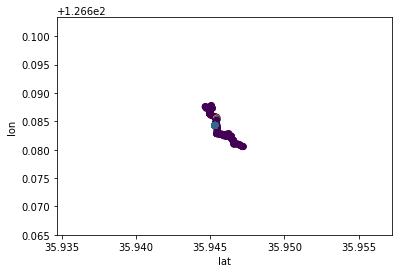

cluster of count  3
9


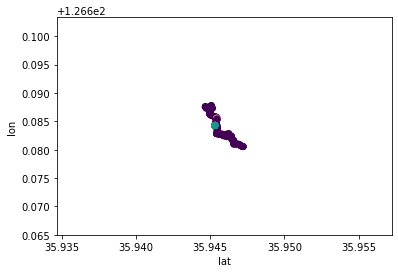

cluster of count  2
10


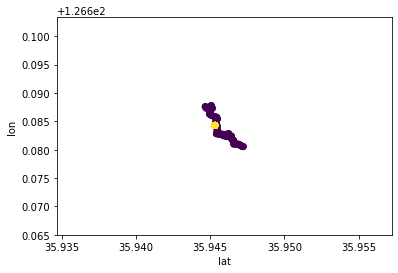

cluster of count  1
11


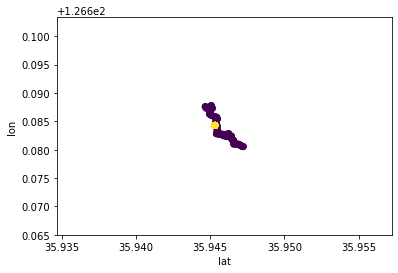

cluster of count  1
12


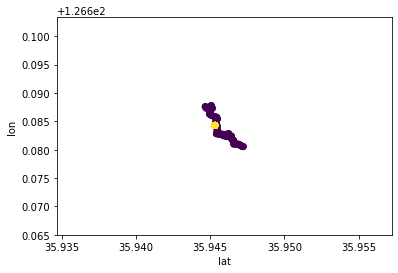

cluster of count  1
13


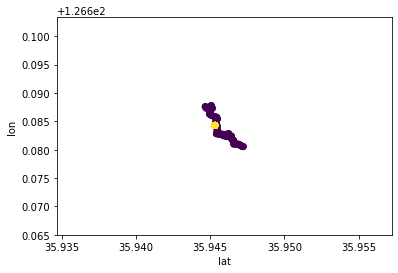

cluster of count  1
14


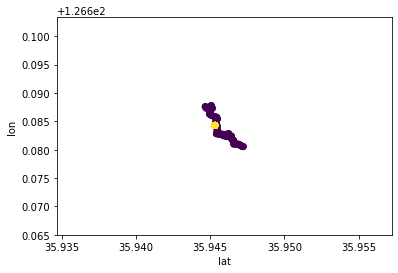

cluster of count  1
15


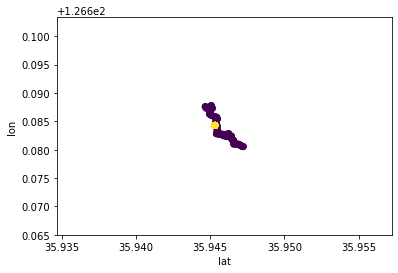

cluster of count  1
16


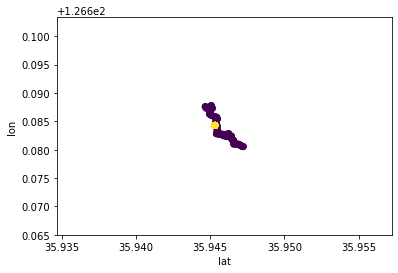

cluster of count  1
17


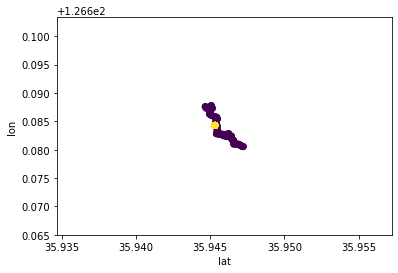

cluster of count  1
18


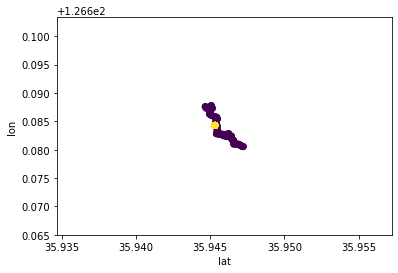

cluster of count  1
19


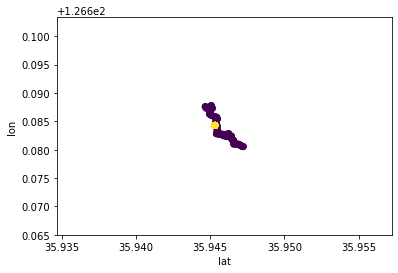

cluster of count  1
20


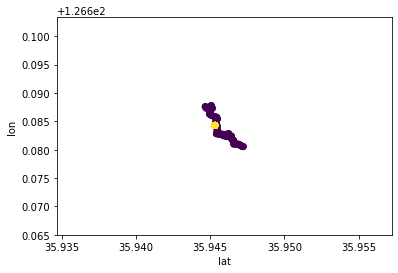

cluster of count  1
21


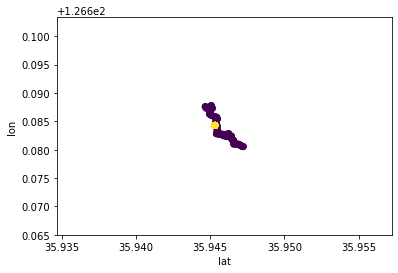

cluster of count  1
22


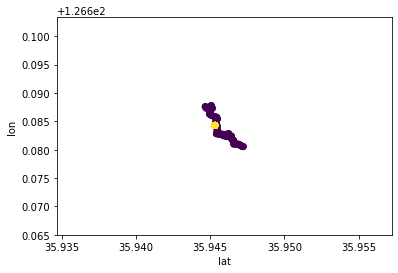

cluster of count  1
23


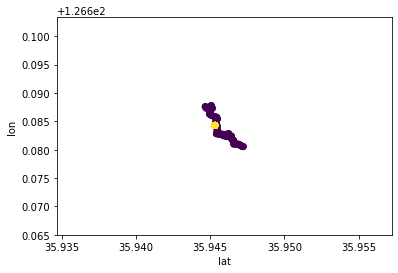

cluster of count  1
24


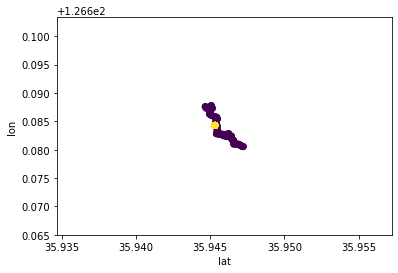

cluster of count  1
25


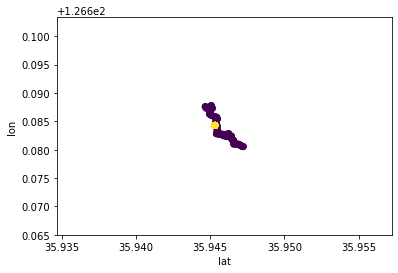

cluster of count  1
26


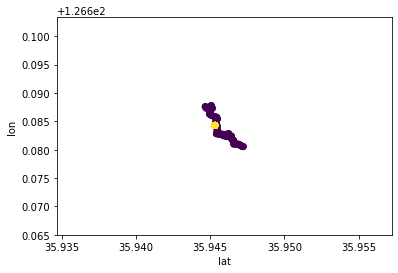

cluster of count  1
27


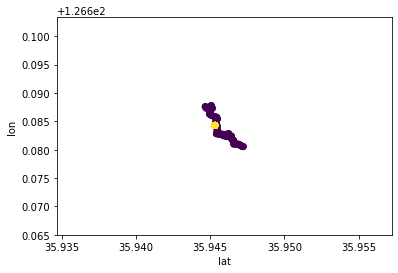

cluster of count  1
28


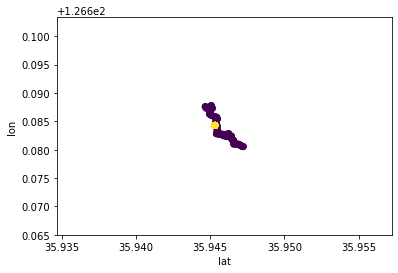

cluster of count  1
29


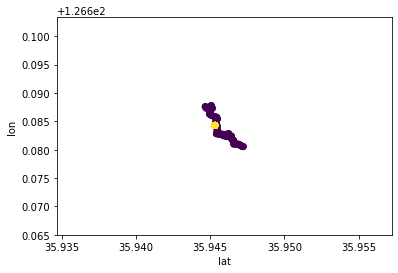

cluster of count  1
30


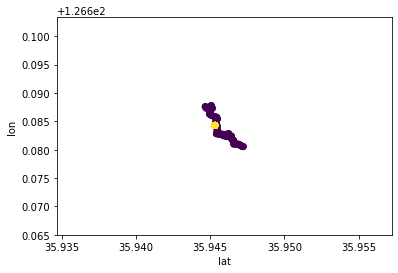

cluster of count  1
31


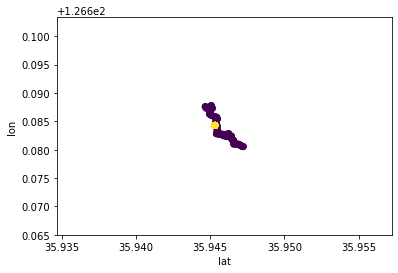

cluster of count  1
32


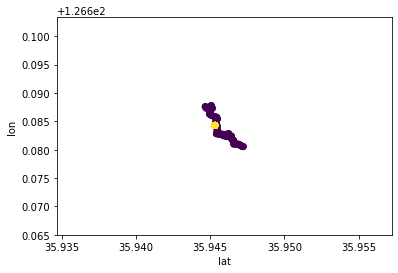

cluster of count  1
33


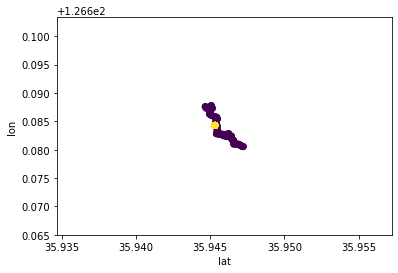

cluster of count  1
34


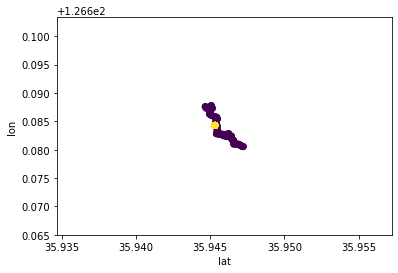

cluster of count  1
35


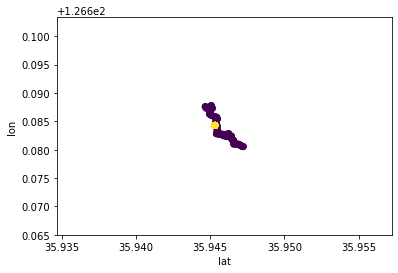

cluster of count  1
36


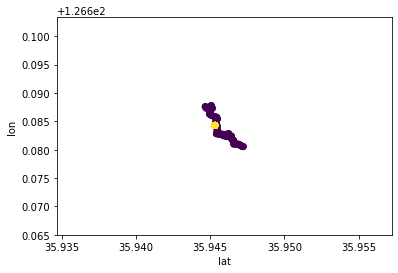

cluster of count  1
37


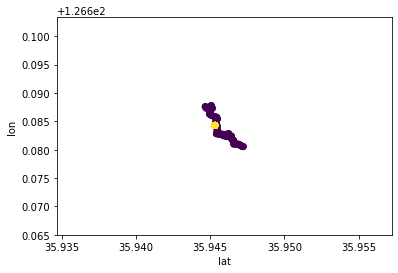

cluster of count  1
38


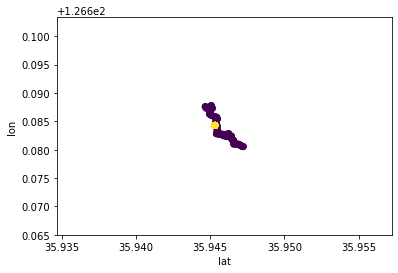

cluster of count  1
39


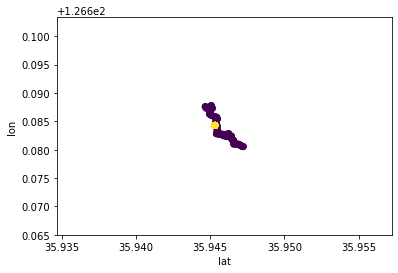

cluster of count  1
40


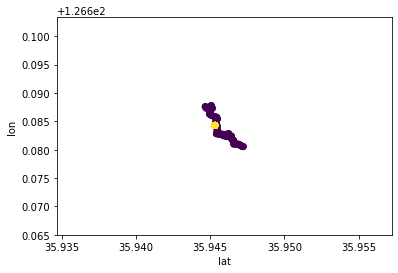

cluster of count  1
41


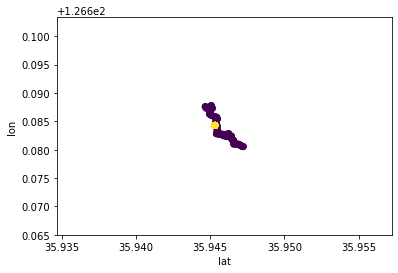

cluster of count  1
42


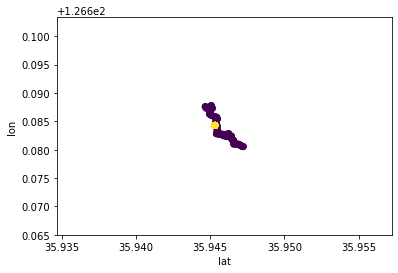

cluster of count  1
43


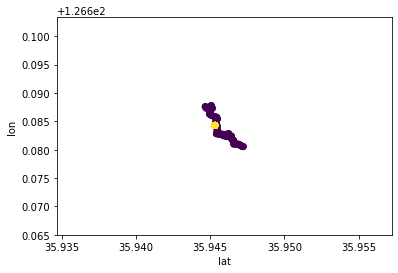

cluster of count  1
44


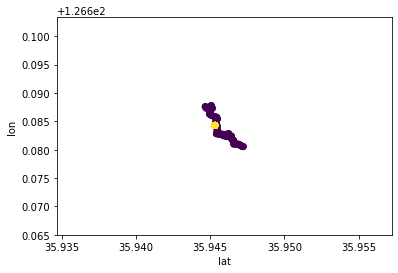

cluster of count  1
45


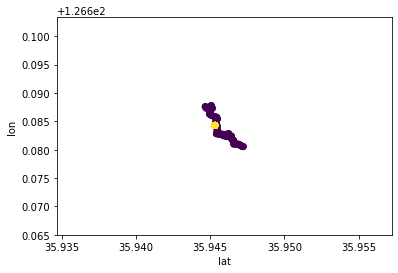

cluster of count  1
46


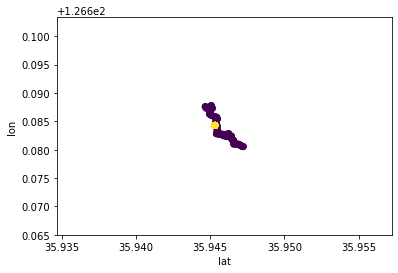

cluster of count  1
47


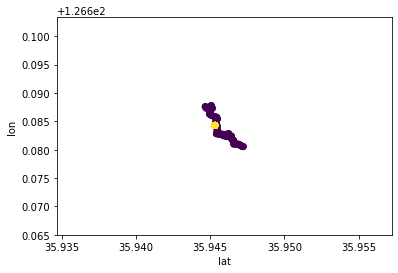

cluster of count  1
48


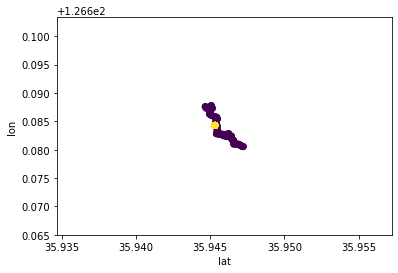

cluster of count  1
49


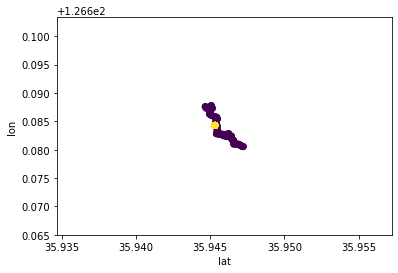

cluster of count  1
50


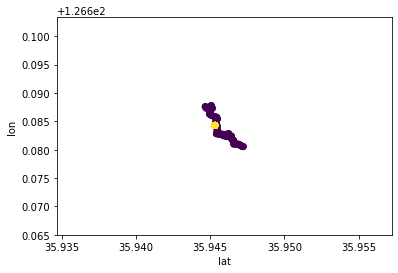

cluster of count  1
51


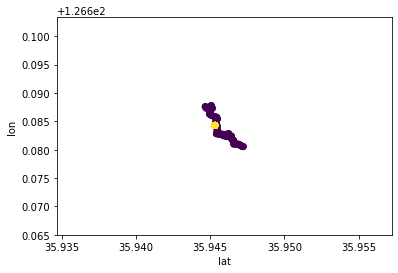

cluster of count  1
52


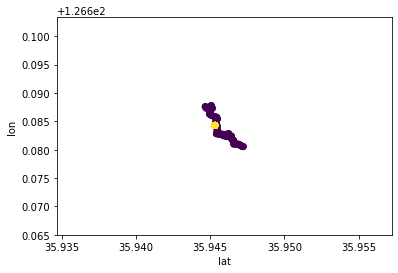

cluster of count  1
53


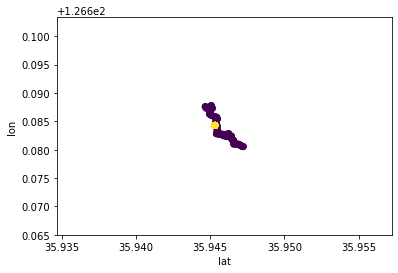

cluster of count  1
54


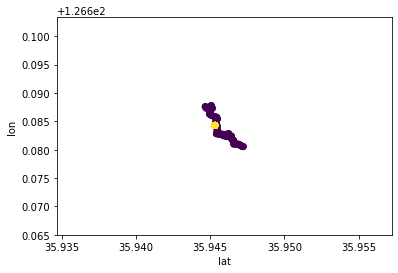

cluster of count  1
55


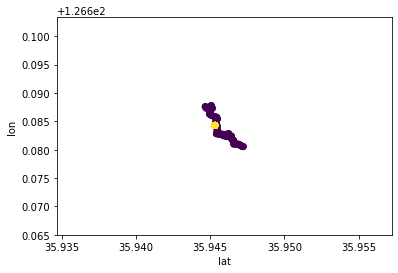

cluster of count  1
56


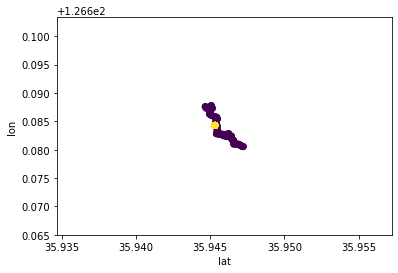

cluster of count  1
57


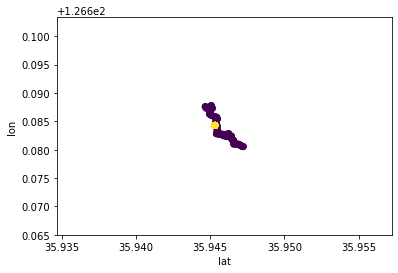

cluster of count  1
58


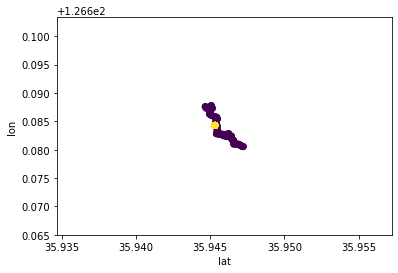

cluster of count  1
59


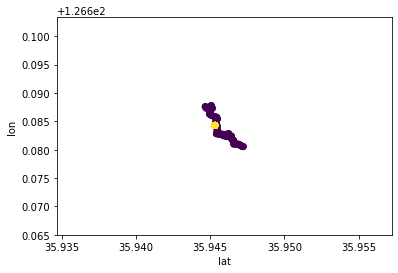

cluster of count  1
60


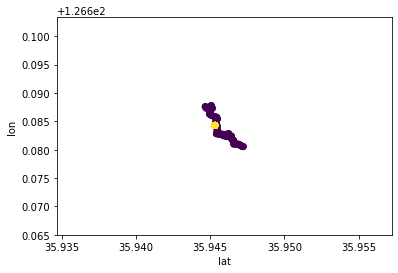

cluster of count  1
61


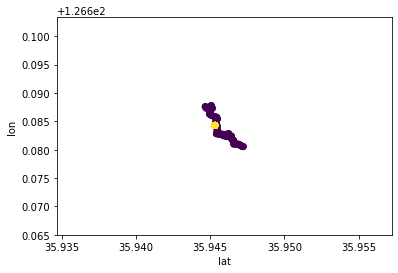

cluster of count  1
62


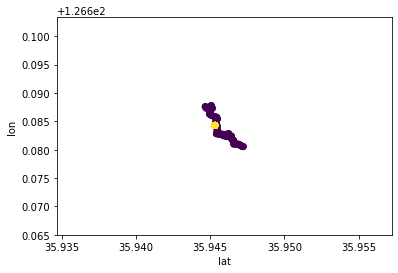

cluster of count  1
63


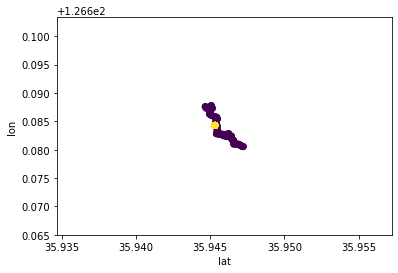

cluster of count  1
64


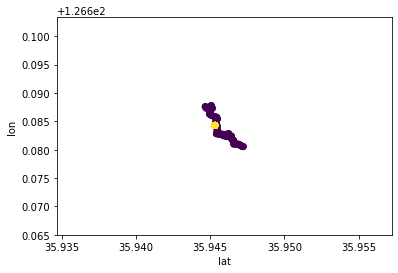

cluster of count  1
65


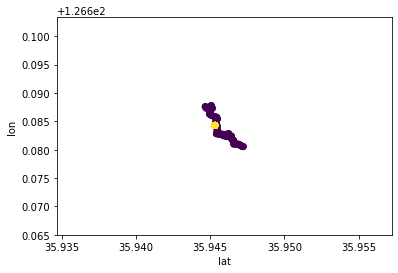

cluster of count  1
66


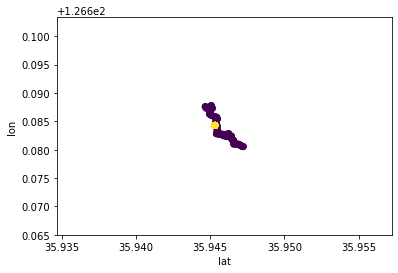

cluster of count  1
67


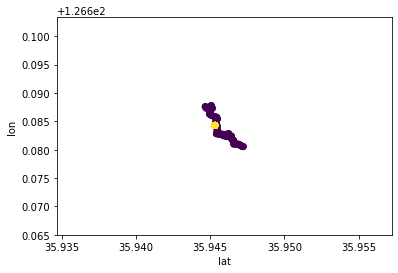

cluster of count  1
68


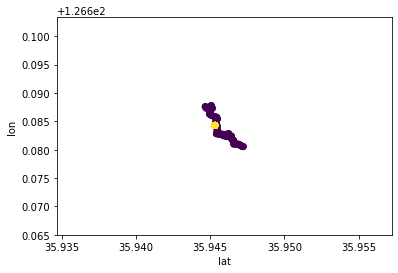

cluster of count  1
69


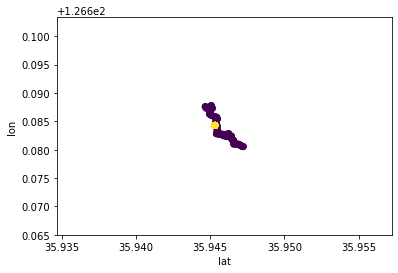

cluster of count  1
70


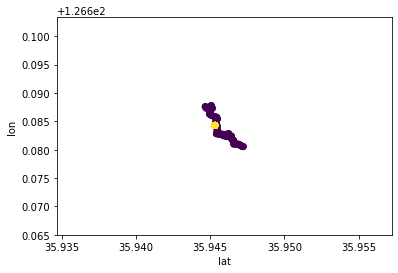

cluster of count  1
71


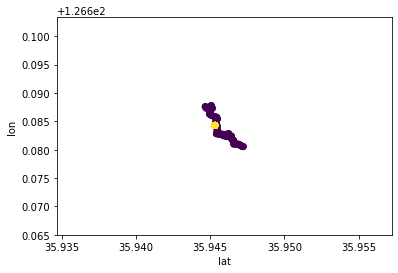

cluster of count  1
72


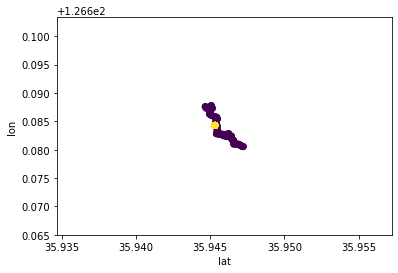

cluster of count  1
73


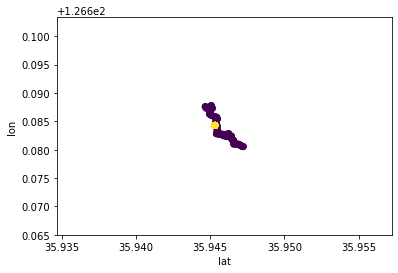

cluster of count  1
74


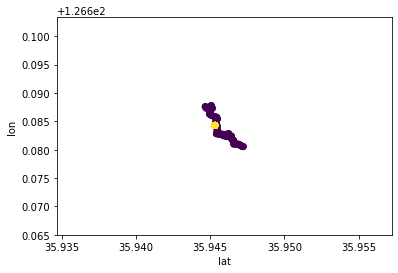

cluster of count  1
75


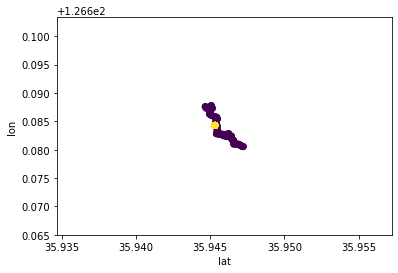

cluster of count  1
76


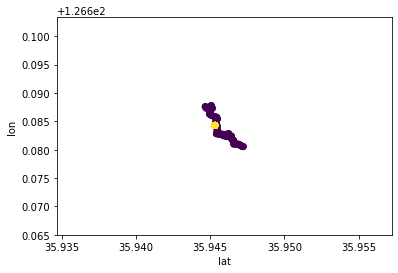

cluster of count  1
77


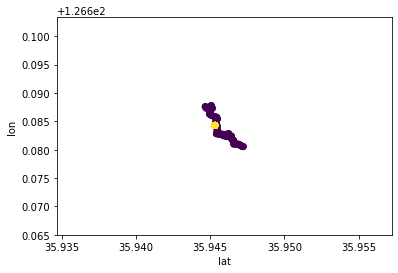

cluster of count  1
78


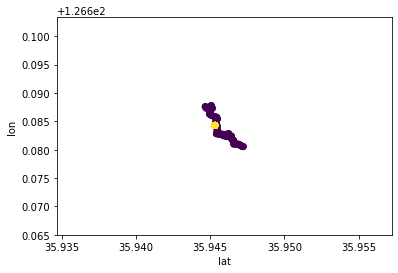

cluster of count  1
79


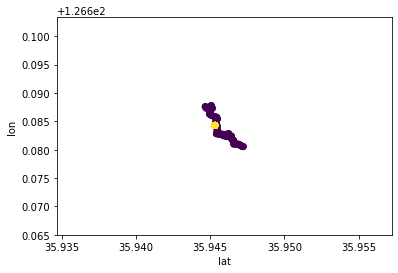

cluster of count  1
80


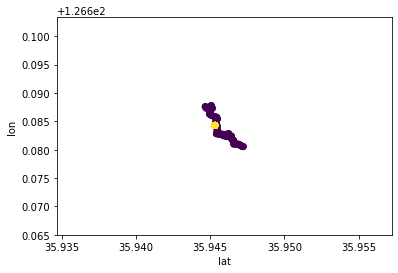

cluster of count  1
81


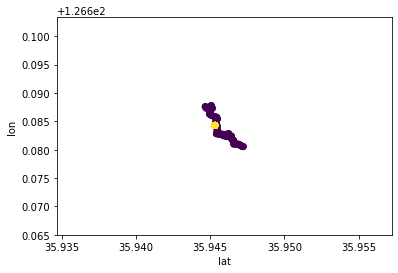

cluster of count  1
82


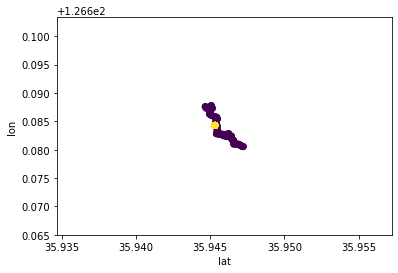

cluster of count  1
83


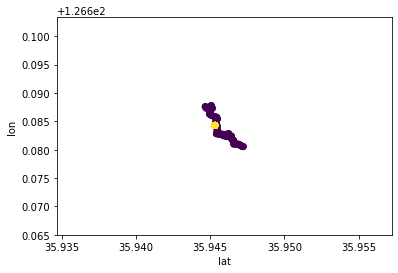

cluster of count  1
84


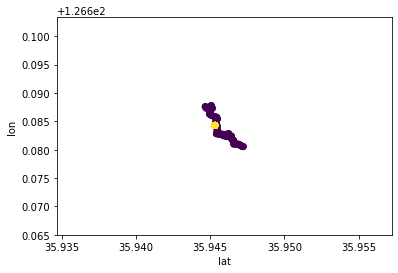

cluster of count  1
85


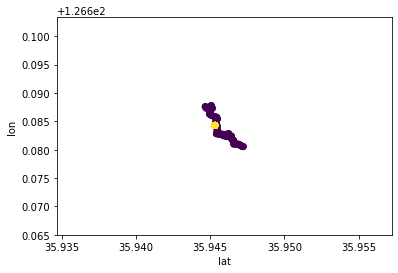

cluster of count  1
86


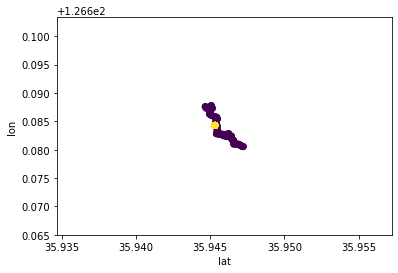

cluster of count  1
87


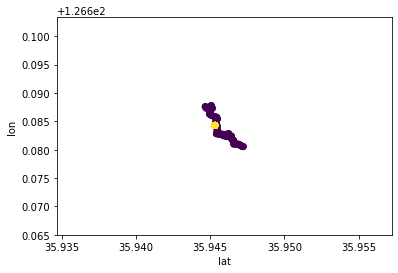

cluster of count  1
88


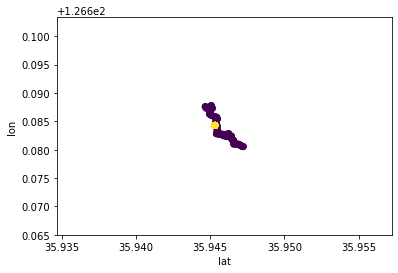

cluster of count  1
89


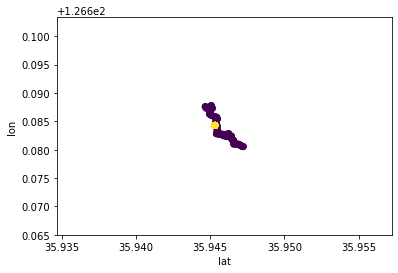

cluster of count  1
90


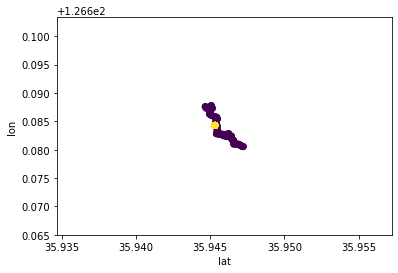

cluster of count  1
91


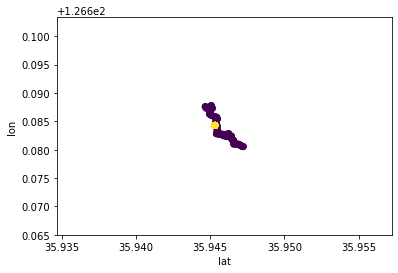

cluster of count  1
92


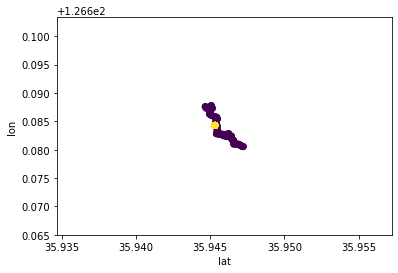

cluster of count  1
93


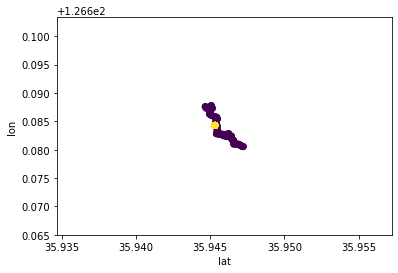

cluster of count  1
94


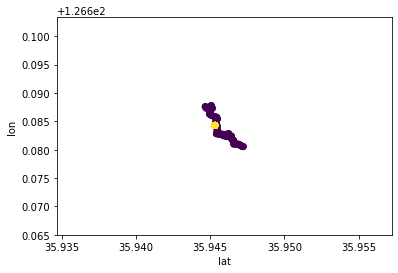

cluster of count  1
95


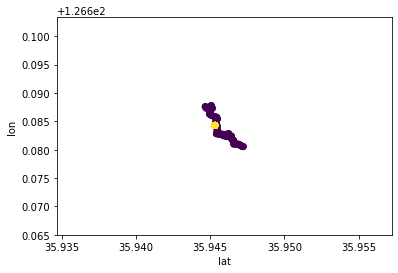

cluster of count  1
96


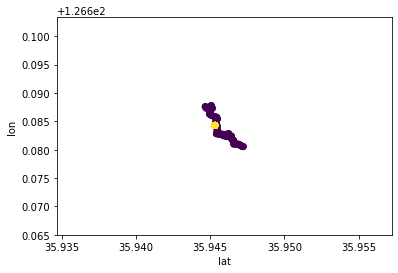

cluster of count  1
97


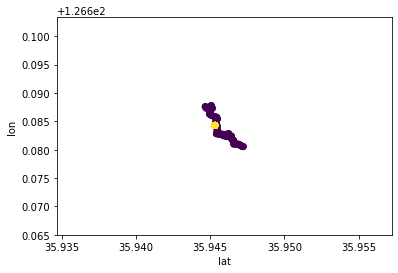

cluster of count  1
98


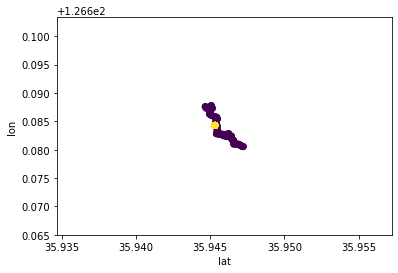

cluster of count  1
99


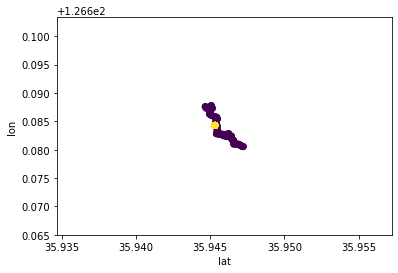

cluster of count  1


In [44]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

for i in range(1,100):
    db = DBSCAN(eps=wcss[4], min_samples=i,metric='euclidean').fit(x)
    cluster = db.fit_predict(x)
    label = db.labels_
    cluster_label = get_cluster_count(label)
    plt.scatter(x = df['lat'],y = df['lon'], c=cluster)
    print(i)
    plt.xlabel("lat")
    plt.ylabel("lon")
    plt.show()
    print("cluster of count ",len(cluster_label)-1)

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
X_scaled = scaler.transform(x)

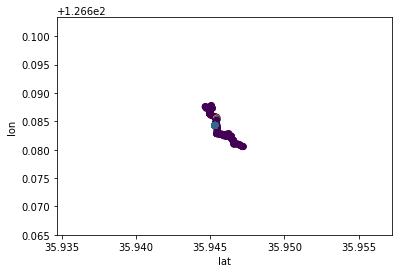

cluster of count  3


In [47]:
db = DBSCAN(eps=wcss[4], min_samples=7,metric='euclidean').fit(x)
cluster = db.fit_predict(x)
label = db.labels_
cluster_label = get_cluster_count(label)
plt.scatter(x = df['lat'],y = df['lon'], c=cluster)
plt.xlabel("lat")
plt.ylabel("lon")
plt.show()
print("cluster of count ",len(cluster_label)-1)

In [48]:
print(label)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1
  1 -1  2  2  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0

In [49]:
def get_cluster_count(cluster):
    cluster_list = []
    for i in cluster:
        if i not in cluster_list:
            cluster_list.append(i)
    return cluster_list

In [50]:
cluster_label = get_cluster_count(label)
print(cluster_label)
cluster_label.remove(-1)
print(cluster_label)  

[0, -1, 1, 2]
[0, 1, 2]


In [51]:
cluster_list = [ [] for i in range(len(cluster_label))]

for i in range(len(cluster_label)):
    for j in range(len(label)):
        if cluster_label[i] == label[j]:
            x_data = x.tolist()
            cluster_list[i].append([str(df['time'][j]), x_data[j][0], x_data[j][1]])

In [52]:
cluster_list

[[['2019-04-09 12:54:04', 35.9453239440918, 126.6842727661133],
  ['2019-04-09 12:54:09', 35.9453239440918, 126.6842727661133],
  ['2019-04-09 12:54:14', 35.9453239440918, 126.6842727661133],
  ['2019-04-09 12:54:19', 35.9453239440918, 126.6842727661133],
  ['2019-04-09 12:54:24', 35.9453239440918, 126.6842727661133],
  ['2019-04-09 12:54:29', 35.9453239440918, 126.6842727661133],
  ['2019-04-09 12:54:34', 35.9453239440918, 126.6842727661133],
  ['2019-04-09 12:54:39', 35.9453239440918, 126.6842727661133],
  ['2019-04-09 12:54:44', 35.9453239440918, 126.6842727661133],
  ['2019-04-09 12:54:49', 35.9453239440918, 126.6842727661133],
  ['2019-04-09 12:54:54', 35.9453239440918, 126.6842727661133],
  ['2019-04-09 12:54:59', 35.9453239440918, 126.6842727661133],
  ['2019-04-09 12:55:04', 35.9453239440918, 126.6842727661133],
  ['2019-04-09 12:55:09', 35.9453239440918, 126.6842727661133],
  ['2019-04-09 12:55:14', 35.9453239440918, 126.6842727661133],
  ['2019-04-09 12:55:19', 35.94532394409

In [38]:
place_list = []
for k in range(len(cluster_list)):
    for i in range(len(cluster_list[k])):
        addr, roadaddr,building = kakao_reverse_geocode(cluster_list[k][i][1],cluster_list[k][i][2])
        for j in addr:
            place = kakao_get_place(j)
            if place[0] == "no results":
                place = building
            print(i+1, "->" ,j)
            #print(place)
            place_list.append(place)

1 -> 전북 군산시 미룡동 290-2
2 -> 전북 군산시 미룡동 290-2
3 -> 전북 군산시 미룡동 290-2
4 -> 전북 군산시 미룡동 290-2
5 -> 전북 군산시 미룡동 290-2
6 -> 전북 군산시 미룡동 290-2
7 -> 전북 군산시 미룡동 290-2
8 -> 전북 군산시 미룡동 290-2
9 -> 전북 군산시 미룡동 290-2
10 -> 전북 군산시 미룡동 290-2


KeyboardInterrupt: 

In [365]:
place_list

[['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['수오브스토리', '아이폰의모든것'],
 ['no results'],
 ['no results'],
 ['수오브스토리', '아이폰의모든것'],
 ['수오브스토리', '아이폰의모든것'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['수오브스토리', '아이폰의모든것'],
 ['수오브스토리', '아이폰의모든것'],
 ['수오브스토리', '아이폰의모든것'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['수오브스토리', '아이폰의모든것'],
 ['수오브스토리', '아이폰의모든것'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no results'],
 ['no res

In [53]:
cluster_center = []
for i in range(len(cluster_list)):
    lat_sum = 0
    lon_sum = 0
    for j in range(len(cluster_list[i])):
        lat_sum += cluster_list[i][j][1]
        lon_sum += cluster_list[i][j][2]
    cluster_center.append([lat_sum / len(cluster_list[i]) , lon_sum / len(cluster_list[i])])

# 클러스터 중심점

In [54]:
for i in range(len(cluster_center)):
    print(i+1, "->", cluster_center[i])

1 -> [35.94532397436717, 126.68427284180173]
2 -> [35.94543647766113, 126.6852741241455]
3 -> [35.9454460144043, 126.68551720513236]


In [55]:
cluster_center

[[35.94532397436717, 126.68427284180173],
 [35.94543647766113, 126.6852741241455],
 [35.9454460144043, 126.68551720513236]]

In [56]:
for i in range(len(cluster_center)):
    addr, roadaddr,building = kakao_reverse_geocode(cluster_center[i][0],cluster_center[i][1])
    for j in addr:
        place = kakao_get_place(j)
        if place[0] == "no results":
            place = building
        print(i+1, "->" ,j)
        print(place)

1 -> 전북 군산시 미룡동 290-2
['군산대학교', '전북은행 군산대지점', 'GS25 군산대본점', 'CU 군산대학생회관점', 'CU 군산대도서관점', '군산대학교 황룡도서관', '헌혈의집 군산대센터', '군산대학교 대학본부', '군산대학교 디지털정보관', '군산대학교 학생생활관 관리동', '동원문고', '군산대학교 중앙도서관', '군산대학교정류소', '군산대학교 제2학생회관', '한울미디어', '군산대학교 박물관', 'IBK기업은행365 군산대학교출장소', '더큰도시락 군산대점', '군산대학교 산업대학원', '사회관', '군산대학교 문무관', '군산대학교 황룡문화원', '베토벤안경원', '군산대학교 간호학과', '군산대생협그라찌에', '군산 청년해외취업지원센터', '군산대학교 음악관', '비엔트리니티', '체험과여행사업단', '군산시 귀어귀촌지원센터', '군산대학교 종합교육관', '카페드림 군산대학교중앙도서관점', '군산대학교 교육대학원', '군산대학교 인문대학사회과학대학', '군산대학교 남문', '군산대학교 자연과학대학4호관', '군산대학교 누리관', '군산 대학교 테니스장1', '군산대학교 농구장2', '군산대학교 자연과학대학1호관', '군산대학교 진리관', '군산대학교 스포츠과학관', '군산대학교 평생교육원제2동', '전북은행ATM 군산대지점', '황룡쉼터']
2 -> 전북 군산시 미룡동 315-5
['군산대학교 종합운동장']
3 -> 전북 군산시 미룡동 315-5
['군산대학교 종합운동장']


In [57]:
import numpy as np
import folium
from matplotlib import pyplot as plt
import matplotlib as mpl

lower_left = [35.94053805, 126.677630592098]
upper_right = [35.951225, 126.689017999998]
m = folium.Map(zoom_start = 15, location=[35.945881525000004, 126.683324296048])

for i in range(len(cluster_center)):
    folium.Marker(location=[cluster_center[i][0], cluster_center[i][1]], popup = (i+1)).add_to(m)

m